# Protocol for identifying bird call times

Here we examine steps in how to identify bird call times (matlab portion)

## Step 1: Building Training Set
Here we use station 3 as example

### 1.1 Bird Times

In [1]:
load('C:\Users\Lauren\Desktop\Summer17\CITI\USBS\NTFHG_20170712_S3.mat')

In [12]:
cd ../PC-NMF/Analysis_tool

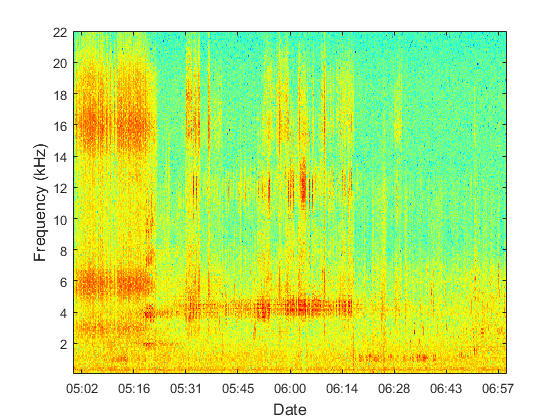

In [13]:
[data, time_vec, f]=View_LTSA(Result, 3);

In [15]:
cd ../

In [23]:
% specific time corresponding to segment we want
list = 57000:57300;
time_vec_bird = time_vec(list);
[output, W, W_cluster, H]=LTSA_PCNMF(matrix_standardization(data(:,list)),4,6);

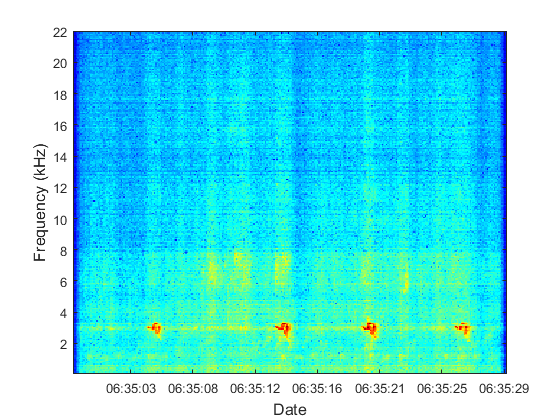

In [24]:
% separated data: bird call
imagesc(time_vec(list),f,output(:,:,1)); axis xy;
datetick('x','keeplimits','keepticks');
xlabel('Date','FontSize',12); ylabel('Frequency (kHz)','FontSize',12);
colormap('jet');

#### Clean

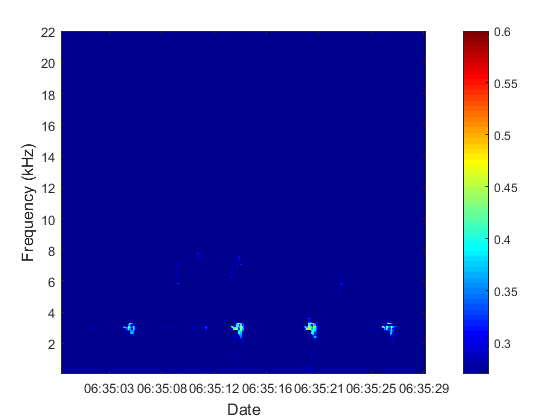

In [27]:
% separated data: bird call
imagesc(time_vec_bird,f,output(:,:,1)); axis xy;
datetick('x','keeplimits','keepticks');
xlabel('Date','FontSize',12); ylabel('Frequency (kHz)','FontSize',12);
colormap('jet'); colorbar; caxis([0.27,0.6])

### 1.2 Noise

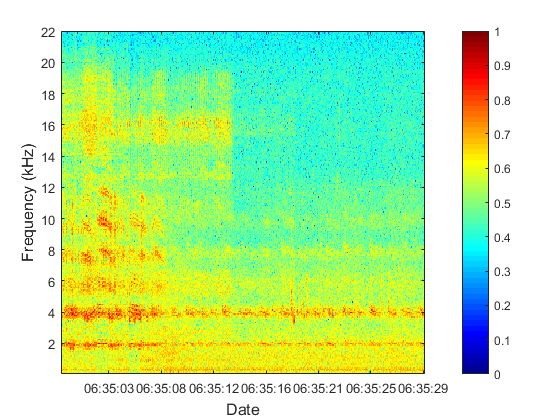

In [31]:
% specific time corresponding to segment we want
% the following bird calls are the only times they appear
list = 13000:15000;
[output, W, W_cluster, H]=LTSA_PCNMF(matrix_standardization(data(:,list)),1,1);
% separated data: bird call
imagesc(time_vec_bird,f,output(:,:,1)); axis xy;
datetick('x','keeplimits','keepticks');
xlabel('Date','FontSize',12); ylabel('Frequency (kHz)','FontSize',12);
colormap('jet'); colorbar;

Once we collected enough bird calls and noise data

## Step 2: Training into Supervised

In [33]:
cd ../supervised

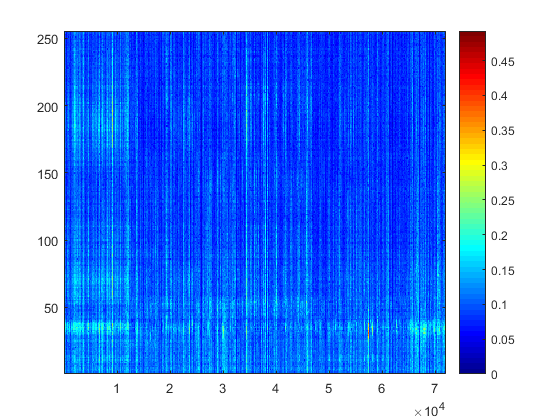

In [34]:
load('sup_303.mat')
imagesc(output); axis xy;
colormap('jet'); colorbar;

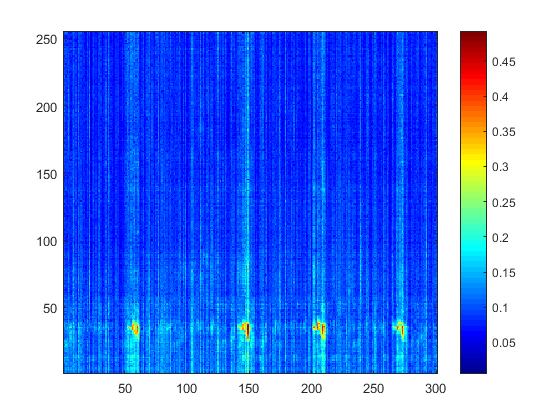

In [38]:
list = 57000:57300;
imagesc(output(:,list)); axis xy;
colormap('jet'); colorbar; 

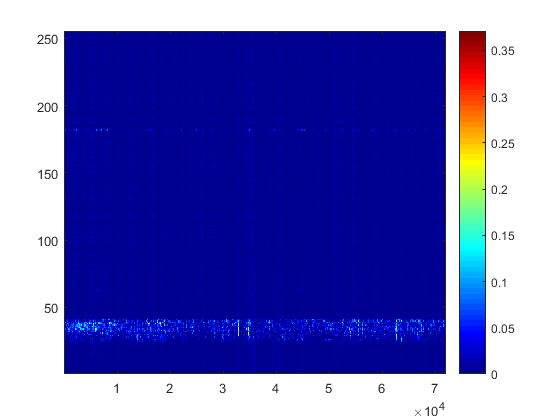

In [39]:
# cleaned training set
load('sup_c303.mat')
imagesc(output); axis xy;
colormap('jet'); colorbar;

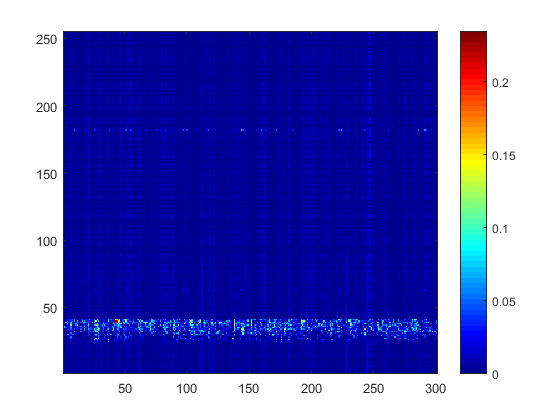

In [40]:
list = 57000:57300;
imagesc(output(:,list)); axis xy;
colormap('jet'); colorbar; 

In [ ]:
# Save the time_vec and f as well
load('sup_c303.mat')
output = bird_new;
save('sup_c303.mat','output','time_vec','f')

## Step 3: Get Call Times

In [41]:
cd C:\Users\Lauren\Desktop\Summer17\CITI\USBS\auto_detect

In [ ]:
mat = 'C:\Users\Lauren\Desktop\Summer17\CITI\USBS\supervised\sup_c303.mat';

In [ ]:
t = 0.11; % SNR threshold
o = 0.25; % occupancy threshold
yr = 2017;
month = 7;
date = 13;
start_hr = 5;
[call_time]=get_calltime(mat,t,yr,month,date,start_hr,o);